# Cat and Dog Classification

In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import os
import numpy as np
import matplotlib.pyplot as plt

In [6]:
PATH="C:\\Users\\Lenovo\\Desktop\\B.Tech CE\\AI ML\\cats_and_dogs_filtered\\cats_and_dogs_filtered"

In [13]:
# This line creates a file path for the training dataset directory by joining the PATH variable (which represents the main dataset directory) 
# with the string 'train/validation'. This results in a path pointing to the directory containing the training dataset.

train_dir = os.path.join(PATH, 'train')
validation_dir = os.path.join(PATH, 'validation')

In [15]:
train_cats_dir = os.path.join(train_dir, 'cats')  # directory with our training cat pictures
train_dogs_dir = os.path.join(train_dir, 'dogs')  # directory with our training dog pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')  # directory with our validation cat pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')  # directory with our validation dog pictures

In [16]:
num_cats_tr = len(os.listdir(train_cats_dir))
num_dogs_tr = len(os.listdir(train_dogs_dir))

num_cats_val = len(os.listdir(validation_cats_dir))
num_dogs_val = len(os.listdir(validation_dogs_dir))

total_train = num_cats_tr + num_dogs_tr
total_val = num_cats_val + num_dogs_val

In [17]:
print('total training cat images:', num_cats_tr)
print('total training dog images:', num_dogs_tr)

print('total validation cat images:', num_cats_val)
print('total validation dog images:', num_dogs_val)
print("--")
print("Total training images:", total_train)
print("Total validation images:", total_val)

total training cat images: 1000
total training dog images: 1000
total validation cat images: 500
total validation dog images: 500
--
Total training images: 2000
Total validation images: 1000


In [19]:
batch_size = 128
# The batch size determines the number of samples processed before the model's weights are updated during training.

epochs = 5
# An epoch is one complete pass through the entire training dataset. 

IMG_HEIGHT = 150
IMG_WIDTH = 150
# This variable specifies the height/width of the input images to the model.

In [24]:
train_image_generator = ImageDataGenerator(rescale=1./255) # Generator for our training data
# The ImageDataGenerator class from Keras's tensorflow.keras.preprocessing.image module is used for data augmentation and preprocessing. 
# Here, rescale=1./255 is specified as an argument, which normalizes pixel values of the images to the range [0, 1]. 
# This normalization is typically done by dividing each pixel value by 255, as pixel values range from 0 to 255.


validation_image_generator = ImageDataGenerator(rescale=1./255) # Generator for our validation data

In [25]:
# generation of training data
train_data_gen = train_image_generator.flow_from_directory(batch_size=batch_size,
                                                           directory=train_dir,
                                                           shuffle=True,
                                                           target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                           class_mode='binary')

Found 2000 images belonging to 2 classes.


In [26]:
# generation of validation/testing data
val_data_gen = validation_image_generator.flow_from_directory(batch_size=batch_size,
                                                              directory=validation_dir,
                                                              target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                              class_mode='binary')

Found 1000 images belonging to 2 classes.


In [27]:
# This line of code generates a single batch of training data using the train_data_gen generator created earlier. 
# The next() function is used to retrieve the next batch of data from the generator.

sample_training_images, _ = next(train_data_gen)

In [41]:
# plotting the images
def plotImages(images_arr):
    fig, axes = plt.subplots(2, 5, figsize=(20,20))
    axes = axes.flatten()
    # This line flattens the 2D array of "axes" objects into a 1D array
    
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

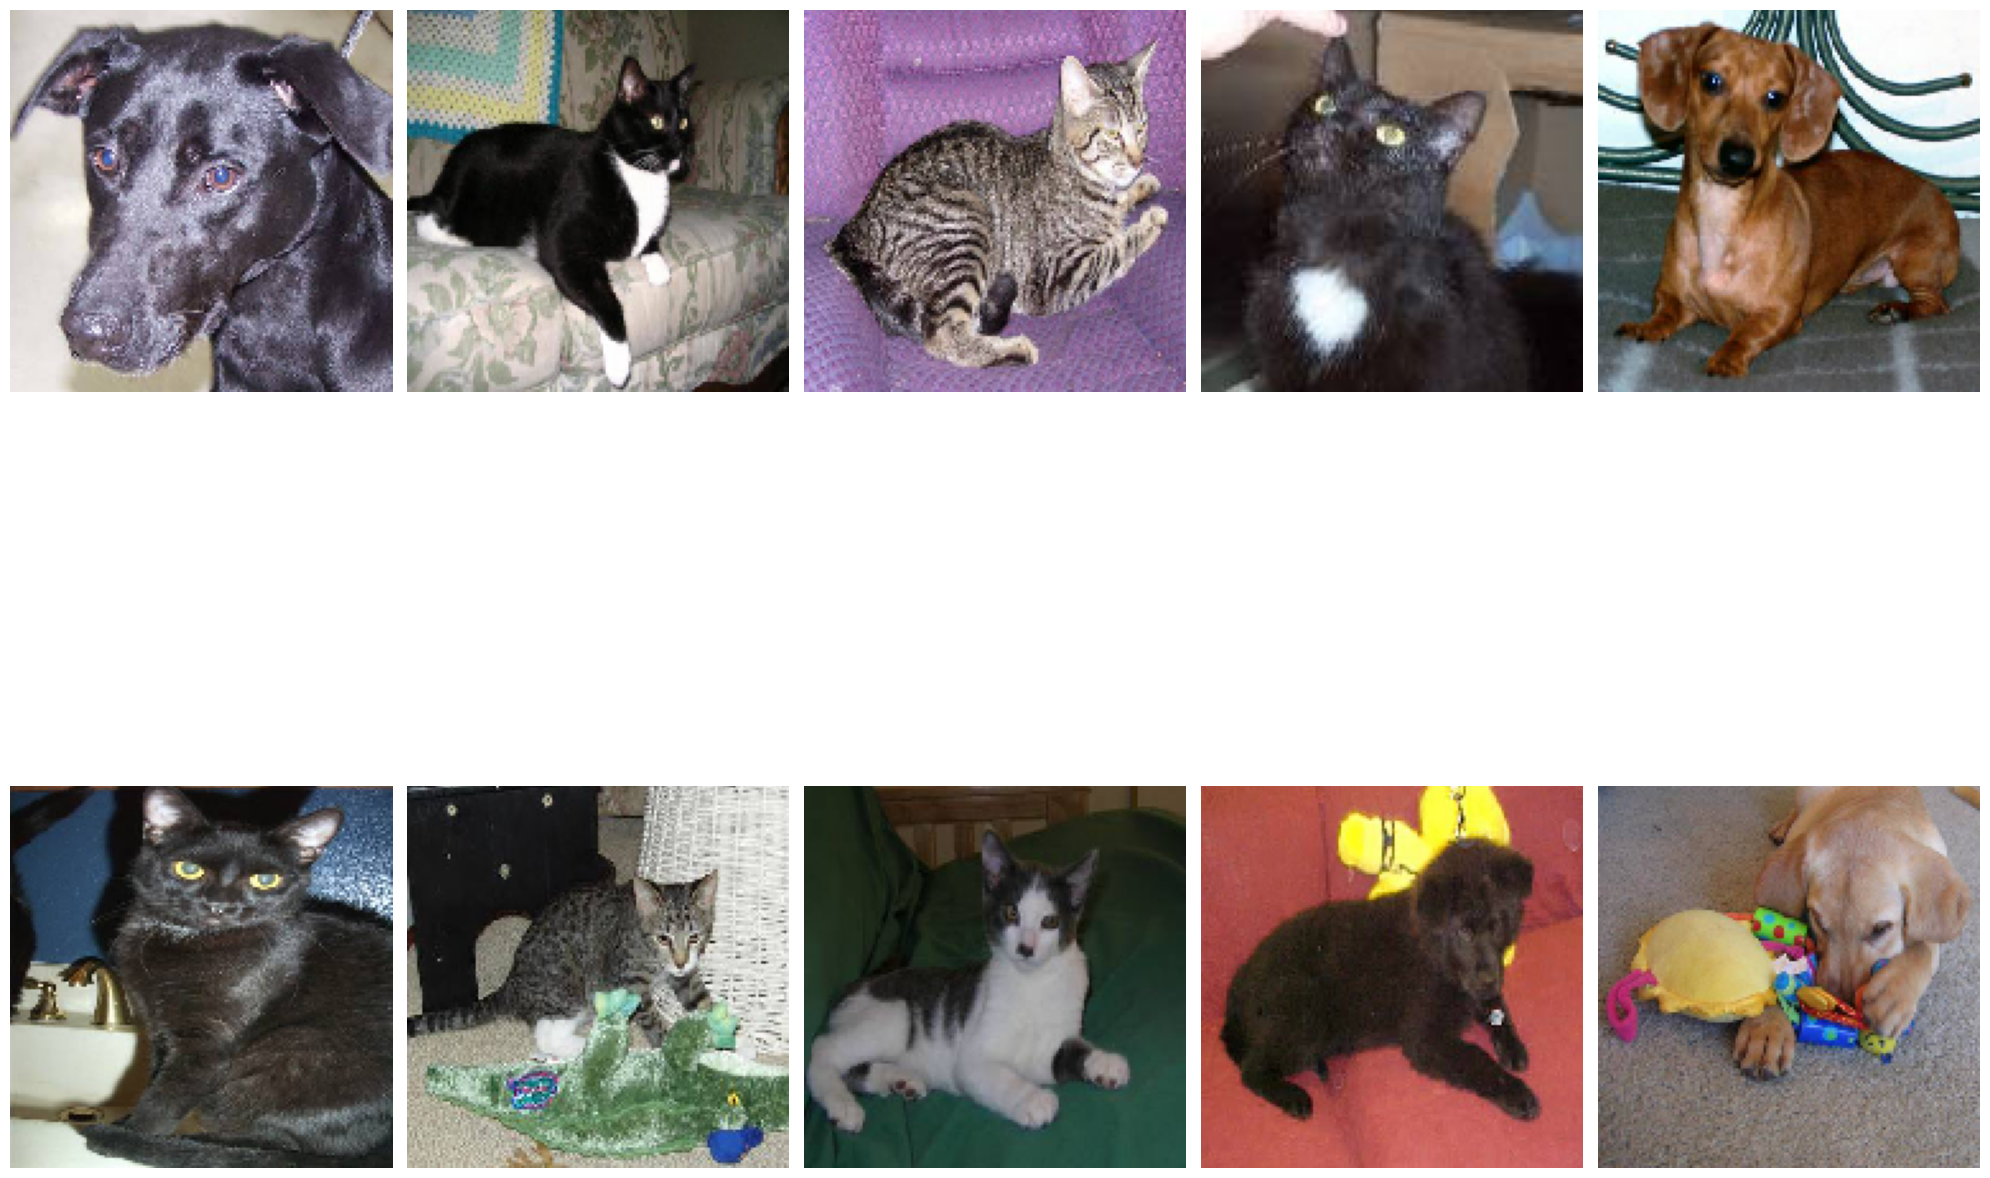

In [42]:
plotImages(sample_training_images[:10])

In [49]:
model = Sequential([
    Conv2D(16, 3, padding='same', activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH ,3)),
    MaxPooling2D(),
    Conv2D(32, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Flatten(),
    Dense(512, activation='relu'),
    # This is a fully connected (dense) layer with 512 neurons and ReLU activation function.
    Dense(1)
    # This is the output layer with a single neuron, which produces the final output of the model.
])

# MaxPooling = This layer performs max pooling operation with a pool size of 2x2, effectively reducing the spatial dimensions of the 
# feature maps by half

In [50]:
import tensorflow as tf

In [51]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [52]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 150, 150, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 75, 75, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 75, 75, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 37, 37, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 37, 37, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 18, 18, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 20736)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 512)            │    10,617,344 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,641,441 (40.59 MB)

 Trainable params: 10,641,441 (40.59 MB)

 Non-trainable params: 0 (0.00 B)

In [54]:
history = model.fit(
    train_data_gen,
    steps_per_epoch=total_train // batch_size,
    epochs=epochs,
    validation_data=val_data_gen,
    validation_steps=total_val // batch_size
)
model.save('CatDogModel.h5')

Epoch 1/5


C:\Users\Lenovo\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


15/15 ━━━━━━━━━━━━━━━━━━━━ 37s 2s/step - accuracy: 0.4981 - loss: 1.2522 - val_accuracy: 0.5424 - val_loss: 0.6848
Epoch 2/5
 1/15 ━━━━━━━━━━━━━━━━━━━━ 8s 589ms/step - accuracy: 0.5625 - loss: 0.6994

C:\Users\Lenovo\anaconda3\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 74ms/step - accuracy: 0.5625 - loss: 0.3730 - val_accuracy: 0.5673 - val_loss: 0.3510
Epoch 3/5
15/15 ━━━━━━━━━━━━━━━━━━━━ 15s 855ms/step - accuracy: 0.5089 - loss: 0.6887 - val_accuracy: 0.5301 - val_loss: 0.6696
Epoch 4/5
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.5000 - loss: 0.3532 - val_accuracy: 0.6154 - val_loss: 0.3480
Epoch 5/5
15/15 ━━━━━━━━━━━━━━━━━━━━ 13s 746ms/step - accuracy: 0.5871 - loss: 0.6604 - val_accuracy: 0.6239 - val_loss: 0.6392


In [55]:
!pip install pydot

In [57]:
from tensorflow.python.framework.convert_to_constants import convert_variables_to_constants_v2

# Load the trained model
model = tf.keras.models.load_model('CatDogModel.h5')

# Convert the Keras model to a TensorFlow concrete function
full_model = tf.function(lambda x: model(x))
full_model = full_model.get_concrete_function(tf.TensorSpec(model.inputs[0].shape, model.inputs[0].dtype))

# Convert variables to constants
frozen_func = convert_variables_to_constants_v2(full_model)

# Get the names of input and output nodes
input_node_name = full_model.inputs[0].name.split(':')[0]
output_node_name = frozen_func.outputs[0].name.split(':')[0]
print("Input node name:", input_node_name)
print("Output node name:", output_node_name)

# Convert the frozen model to XML format
graph_def = frozen_func.graph.as_graph_def()
graph_def = tf.compat.v1.graph_util.remove_training_nodes(graph_def)
graph_def = tf.compat.v1.graph_util.convert_variables_to_constants(None, graph_def, [output_node_name])

# Save the XML file
tf.io.write_graph(graph_def, '.', 'CatDogModel.xml', as_text=True)

Input node name: x
Output node name: Identity
Instructions for updating:
This API was designed for TensorFlow v1. See https://www.tensorflow.org/guide/migrate for instructions on how to migrate your code to TensorFlow v2.


Instructions for updating:
This API was designed for TensorFlow v1. See https://www.tensorflow.org/guide/migrate for instructions on how to migrate your code to TensorFlow v2.


Instructions for updating:
This API was designed for TensorFlow v1. See https://www.tensorflow.org/guide/migrate for instructions on how to migrate your code to TensorFlow v2.


Instructions for updating:
This API was designed for TensorFlow v1. See https://www.tensorflow.org/guide/migrate for instructions on how to migrate your code to TensorFlow v2.


Instructions for updating:
This API was designed for TensorFlow v1. See https://www.tensorflow.org/guide/migrate for instructions on how to migrate your code to TensorFlow v2.


Instructions for updating:
This API was designed for TensorFlow v1. See https://www.tensorflow.org/guide/migrate for instructions on how to migrate your code to TensorFlow v2.


'.\\CatDogModel.xml'

In [58]:
graph_def = tf.compat.v1.graph_util.convert_variables_to_constants(None, graph_def, [output_node_name])

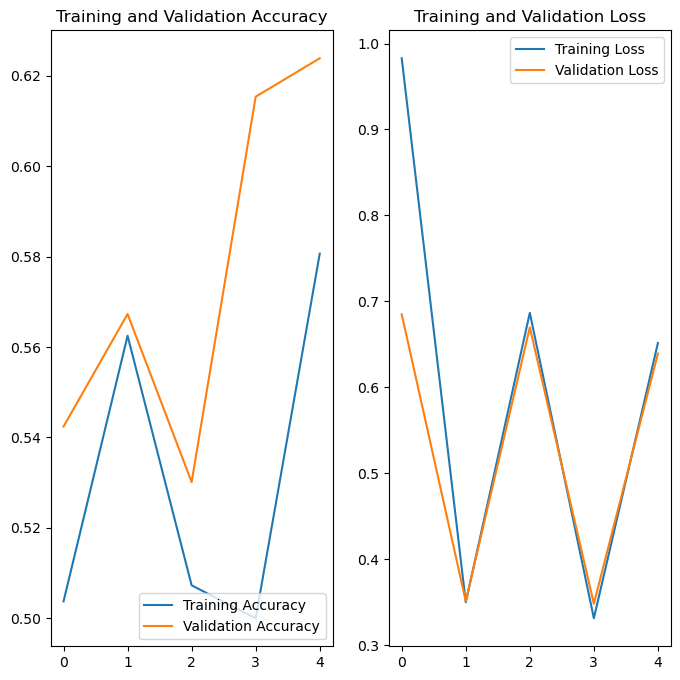

In [60]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss=history.history['loss']
val_loss=history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [100]:
from keras.models import load_model

import cv2

import numpy as np


img = cv2.imread("C:\\Users\\Lenovo\\Desktop\\B.Tech CE\\AI ML\\cats_and_dogs_filtered\\cats_and_dogs_filtered\\validation\\cats\\cat.2045.jpg")

img = cv2.resize(img,(150,150))

img = np.reshape(img,[1,150,150,3])
classes = model.predict(img)

print(classes) 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
[[66.794395]]


In [96]:
print(train_data_gen.class_indices)

{'cats': 0, 'dogs': 1}
